# 25K-7630 SAAD OWAIS

## AI Course Project



# Problem Description

The goal of this project is to develop a forecasting model that accurately predicts future electricity consumption.
The dataset includes variables such as global active power, global reactive power, voltage, and sub-metering measurements!

## Accurate electricity consumption forecasting is important for a number of reasons, including:
- Plan and operate power systems to avoid blackouts or brownouts.
- Invest in new power plants to meet demand.
- Design and target energy efficiency programs to reduce electricity consumption.
- Set the right price for electricity to ensure a fair market.


In [ ]:
import pandas as pd

# Specify the file path
file_path = '/content/household_power_consumption.txt'

# Read the text file into a DataFrame
df = pd.read_csv(file_path, delimiter=";")  # Assuming semicolon-separated values

# Display the DataFrame
print(df.head())


         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [ ]:
# Compute the sum of missing values in each column
na_sum = df.isna().sum()

# Display the sum of missing values
print(na_sum)


Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       1
Voltage                     1
Global_intensity            1
Sub_metering_1              1
Sub_metering_2              1
Sub_metering_3           3906
dtype: int64


In [ ]:
# Check for null values in each row
null_rows = df[df.isnull().any(axis=1)]

# Display the rows with null values
print(null_rows)


              Date      Time Global_active_power Global_reactive_power  \
6839    21/12/2006  11:23:00                   ?                     ?   
6840    21/12/2006  11:24:00                   ?                     ?   
19724   30/12/2006  10:08:00                   ?                     ?   
19725   30/12/2006  10:09:00                   ?                     ?   
41832    14/1/2007  18:36:00                   ?                     ?   
...            ...       ...                 ...                   ...   
303940   15/7/2007  19:04:00                   ?                     ?   
303941   15/7/2007  19:05:00                   ?                     ?   
303942   15/7/2007  19:06:00                   ?                     ?   
303943   15/7/2007  19:07:00                   ?                     ?   
311591   21/7/2007  02:35:00                 0.3                   NaN   

       Voltage Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
6839         ?                ?

# Preprocessing:
Converted variables to necessary data types, separated day, month, year, hour, and minute from date and time, and removed date and time.

In [ ]:
# Convert numeric columns to appropriate data types
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

# Confirm the updated data types
print(df.dtypes)


Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [ ]:
# Check for null values in each row
null_rows = df[df.isnull().any(axis=1)]

# Display the rows with null values
print(null_rows)


              Date      Time  Global_active_power  Global_reactive_power  \
6839    21/12/2006  11:23:00                  NaN                    NaN   
6840    21/12/2006  11:24:00                  NaN                    NaN   
19724   30/12/2006  10:08:00                  NaN                    NaN   
19725   30/12/2006  10:09:00                  NaN                    NaN   
41832    14/1/2007  18:36:00                  NaN                    NaN   
...            ...       ...                  ...                    ...   
303940   15/7/2007  19:04:00                  NaN                    NaN   
303941   15/7/2007  19:05:00                  NaN                    NaN   
303942   15/7/2007  19:06:00                  NaN                    NaN   
303943   15/7/2007  19:07:00                  NaN                    NaN   
311591   21/7/2007  02:35:00                  0.3                    NaN   

        Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
6839        NaN   

In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df

/tmp/ipython-input-936537008.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311587,21/7/2007,02:31:00,0.340,0.254,233.59,1.8,0.0,1.0,0.0,2007-07-21 02:31:00,2007,7,21,2,31
311588,21/7/2007,02:32:00,0.348,0.286,233.45,1.8,0.0,1.0,0.0,2007-07-21 02:32:00,2007,7,21,2,32
311589,21/7/2007,02:33:00,0.348,0.286,233.55,1.8,0.0,1.0,0.0,2007-07-21 02:33:00,2007,7,21,2,33
311590,21/7/2007,02:34:00,0.348,0.286,233.52,1.8,0.0,1.0,0.0,2007-07-21 02:34:00,2007,7,21,2,34


# Transformation:
Created new column "time" that represented the time in a numeric format, ranging from 0 to 1, where 0 corresponds to midnight and 1 corresponds to the end of the day. The data was also taken for every 10 minutes instead of every minute.

In [ ]:
import sys
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
import math
import os

def is_holiday(date):
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])

    if dt.datetime(year, month, day).weekday() >= 5:
        return 1.0
    else:
        return 0.0

for data in [df]:
    data['Is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))
    data['Light']      = data['Time'].apply(lambda x: 1.0 if int(x[:2]) >= 6 and int(x[:2]) < 18 else 0.0)
    data['Time']       = data['Time'].apply(lambda x: (int(x[:2]) * 60.0 + int(x[3:5])) / 1440.0)

In [ ]:
df.drop(['Date'], axis=1, inplace=True)
df.drop(['DateTime'], axis=1, inplace=True)

In [ ]:
df.describe

<bound method NDFrame.describe of             Time  Global_active_power  Global_reactive_power  Voltage  \
0       0.725000                4.216                  0.418   234.84   
1       0.725694                5.360                  0.436   233.63   
2       0.726389                5.374                  0.498   233.29   
3       0.727083                5.388                  0.502   233.74   
4       0.727778                3.666                  0.528   235.68   
...          ...                  ...                    ...      ...   
311587  0.104861                0.340                  0.254   233.59   
311588  0.105556                0.348                  0.286   233.45   
311589  0.106250                0.348                  0.286   233.55   
311590  0.106944                0.348                  0.286   233.52   
311591  0.107639                0.300                    NaN      NaN   

        Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0                   18.4             0.0             1.0            17.0   
1                   23.0             0.0             1.0            16.0   
2                   23.0             0.0             2.0            17.0   
3                   23.0             0.0             1.0            17.0   
4                   15.8             0.0             1.0            17.0   
...                  ...             ...             ...             ...   
311587               1.8             0.0             1.0             0.0   
311588               1.8             0.0             1.0             0.0   
311589               1.8             0.0             1.0             0.0   
311590               1.8             0.0             1.0             0.0   
311591               NaN             NaN             NaN             NaN   

        Year  Month  Day  Hour  Minute  Is_holiday  Light  
0       2006     12   16    17      24         1.0    1.0  
1       2006     12   16    17      25         1.0    1.0  
2       2006     12   16    17      26         1.0    1.0  
3       2006     12   16    17      27         1.0    1.0  
4       2006     12   16    17      28         1.0    1.0  
...      ...    ...  ...   ...     ...         ...    ...  
311587  2007      7   21     2      31         1.0    0.0  
311588  2007      7   21     2      32         1.0    0.0  
311589  2007      7   21     2      33         1.0    0.0  
311590  2007      7   21     2      34         1.0    0.0  
311591  2007      7   21     2      35         1.0    0.0  

[311592 rows x 15 columns]>

In [ ]:
# assuming df is your DataFrame
df = df[df['Minute'] % 10 == 0]

# Cleaning:
Removed null values, which represented 1.25% of the data.

In [ ]:
# Drop rows with any missing values
df.dropna(inplace=True)

/tmp/ipython-input-502418308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
# Check for null values in each row
null_rows = df[df.isnull().any(axis=1)]

# Display the rows with null values
print(null_rows)


Empty DataFrame
Columns: [Time, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3, Year, Month, Day, Hour, Minute, Is_holiday, Light]
Index: []


In [ ]:
# Save the DataFrame as a CSV file
df.to_csv('dataset.csv', index=False)

In [ ]:
import pandas as pd

# Specify the file path
file_path = "/kaggle/working/dataset.csv"

# Read the text file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/dataset.csv'

In [ ]:
df

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Is_holiday,Light
6,0.729167,3.702,0.520,235.09,15.8,0.0,1.0,17.0,2006,12,16,17,30,1.0,1.0
16,0.736111,3.270,0.152,236.73,13.8,0.0,0.0,17.0,2006,12,16,17,40,1.0,1.0
26,0.743056,3.236,0.000,235.84,13.6,0.0,0.0,17.0,2006,12,16,17,50,1.0,1.0
36,0.750000,2.790,0.180,237.52,11.8,0.0,0.0,18.0,2006,12,16,18,0,1.0,0.0
46,0.756944,3.396,0.148,236.20,15.0,0.0,22.0,18.0,2006,12,16,18,10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311546,0.076389,0.186,0.074,235.61,0.8,0.0,1.0,0.0,2007,7,21,1,50,1.0,0.0
311556,0.083333,0.346,0.282,232.58,1.8,0.0,1.0,0.0,2007,7,21,2,0,1.0,0.0
311566,0.090278,0.270,0.190,233.38,1.4,0.0,1.0,0.0,2007,7,21,2,10,1.0,0.0
311576,0.097222,0.180,0.068,234.09,0.8,0.0,2.0,0.0,2007,7,21,2,20,1.0,0.0


# EDA

# Line Plot of Global Active Power over Time:
This plot shows the trend of the global active power over time. It helps visualize any patterns or fluctuations in power consumption

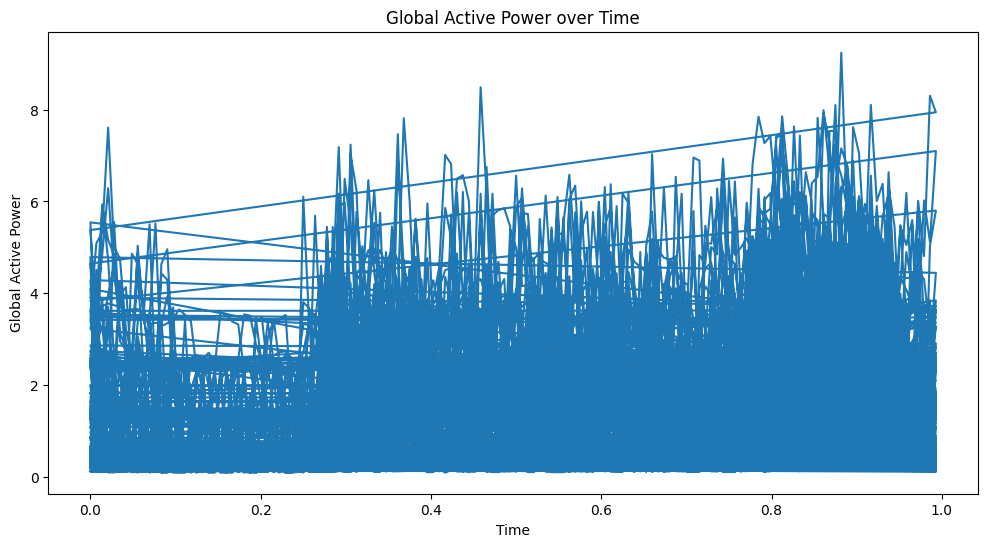

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Global_active_power'])
plt.xlabel('Time')
plt.ylabel('Global Active Power')
plt.title('Global Active Power over Time')
plt.show()


# Histogram of Global Intensity:
A histogram can provide insights into the distribution of the global intensity values, giving an idea of the most common intensity levels.

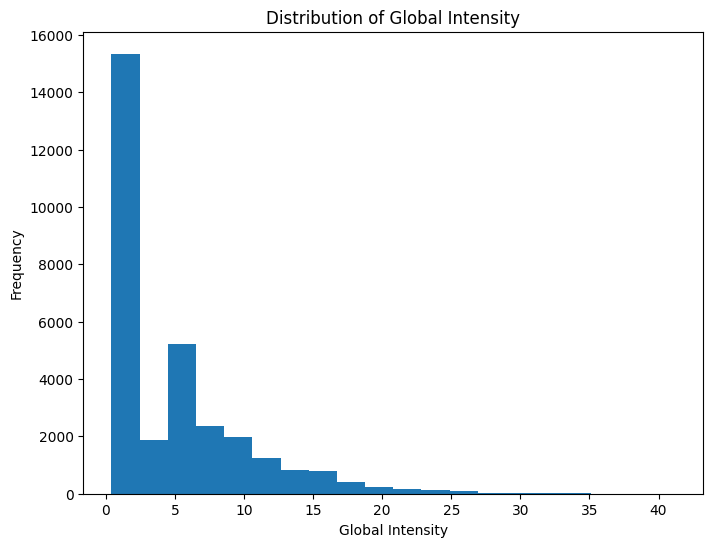

In [ ]:

plt.figure(figsize=(8, 6))
plt.hist(df['Global_intensity'], bins=20)
plt.xlabel('Global Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Global Intensity')
plt.show()


# Box Plot of Sub-metering Measurements:
A box plot can help visualize the distribution and identify outliers in the sub-metering measurements.

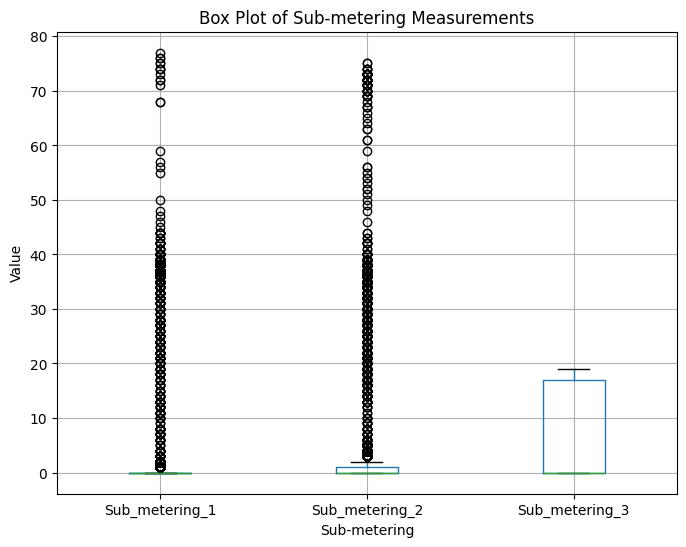

In [ ]:

sub_metering_cols = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
plt.figure(figsize=(8, 6))
df[sub_metering_cols].boxplot()
plt.xlabel('Sub-metering')
plt.ylabel('Value')
plt.title('Box Plot of Sub-metering Measurements')
plt.show()


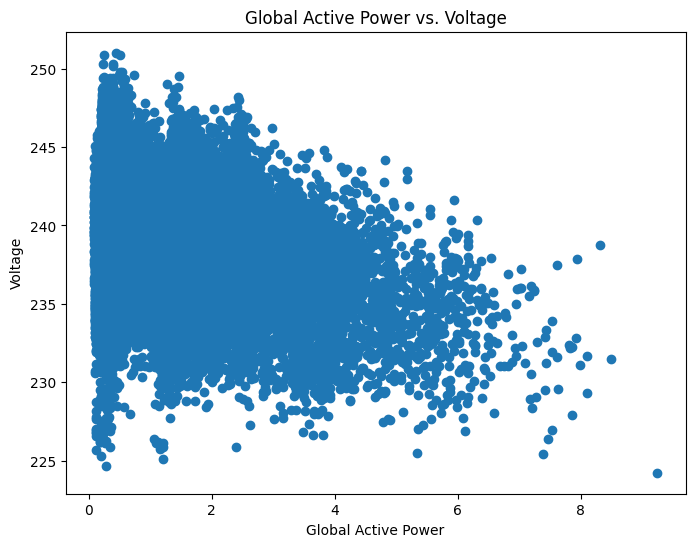

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Global_active_power'], df['Voltage'])
plt.xlabel('Global Active Power')
plt.ylabel('Voltage')
plt.title('Global Active Power vs. Voltage')
plt.show()


## This histogram provides insights into the distribution of voltage values. It can help identify the most common voltage levels and any outliers in the data.


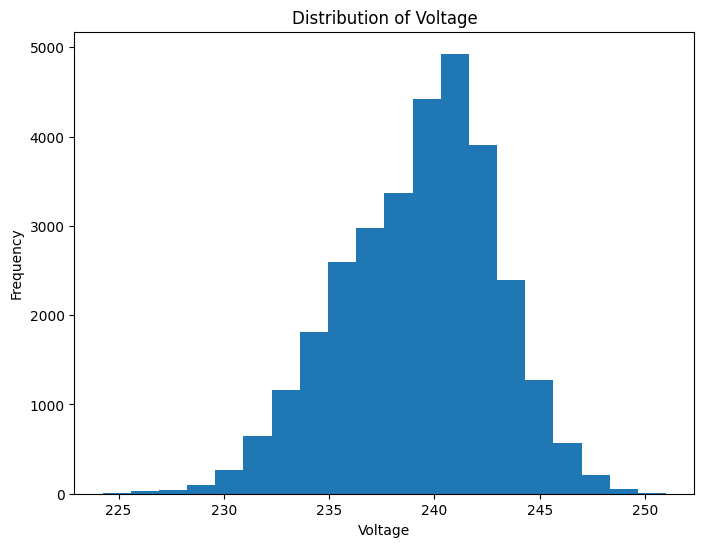

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Voltage'], bins=20)
plt.xlabel('Voltage')
plt.ylabel('Frequency')
plt.title('Distribution of Voltage')
plt.show()


## This box plot displays the distribution of global active power for each month. It allows for comparisons of power consumption across different months and helps identify any monthly trends or variations.


<Figure size 800x600 with 0 Axes>

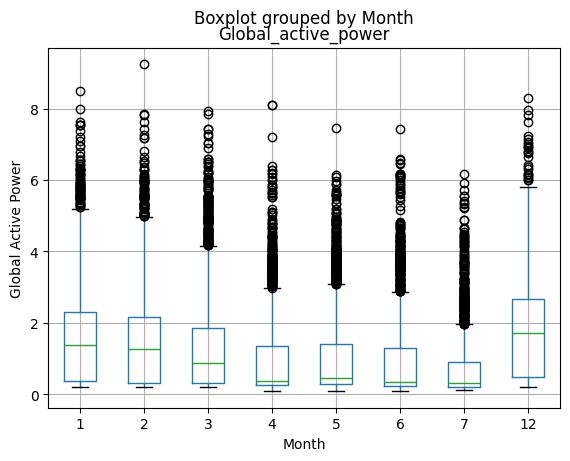

In [ ]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Global_active_power', by='Month')
plt.xlabel('Month')
plt.ylabel('Global Active Power')
plt.show()


##  This scatter plot matrix visualizes the relationships between multiple variables (global active power, global reactive power, voltage, and global intensity) in a single plot. It helps identify correlations and patterns among these variables, providing a comprehensive overview of their relationships


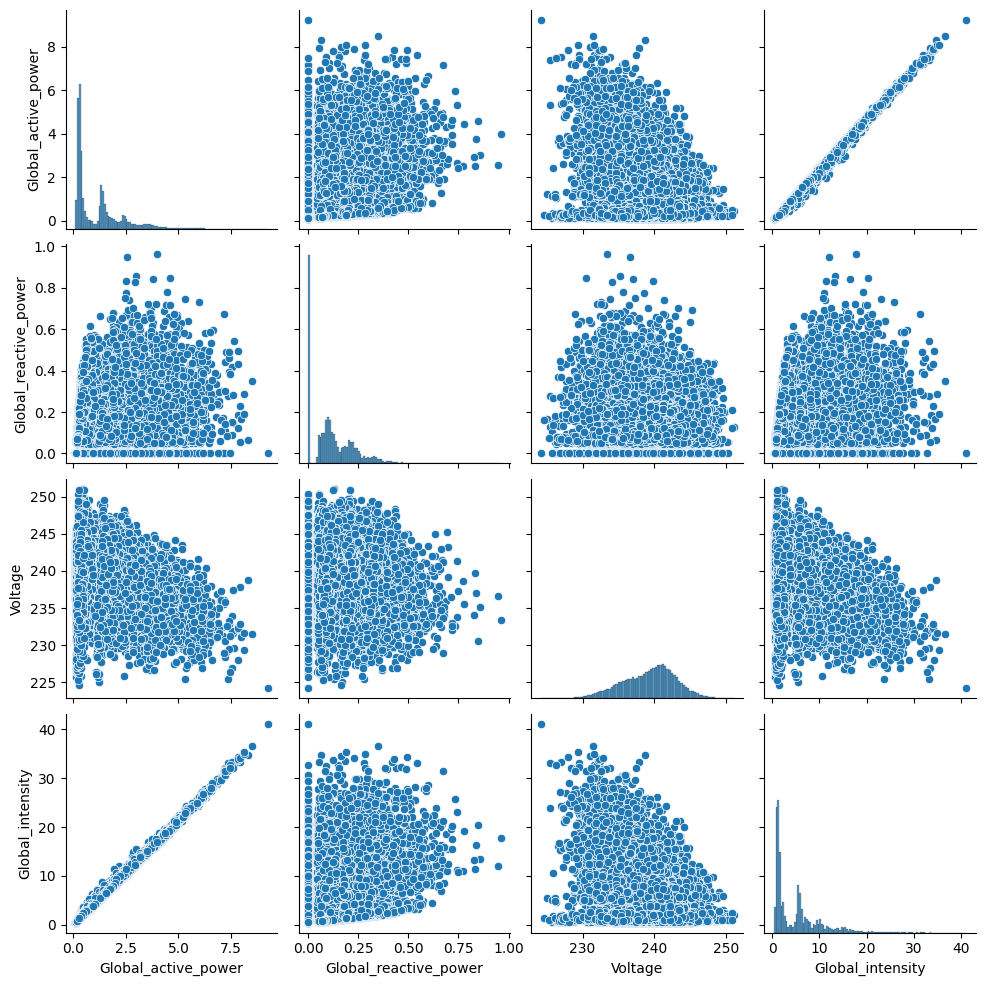

In [ ]:
#  This scatter plot matrix visualizes the relationships between multiple variables (global active power, global reactive power, voltage, and global intensity) in a single plot. It helps identify correlations and patterns among these variables, providing a comprehensive overview of their relationships
import seaborn as sns

variables = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
sns.pairplot(df[variables])
plt.show()


# box plot of yearly global active power

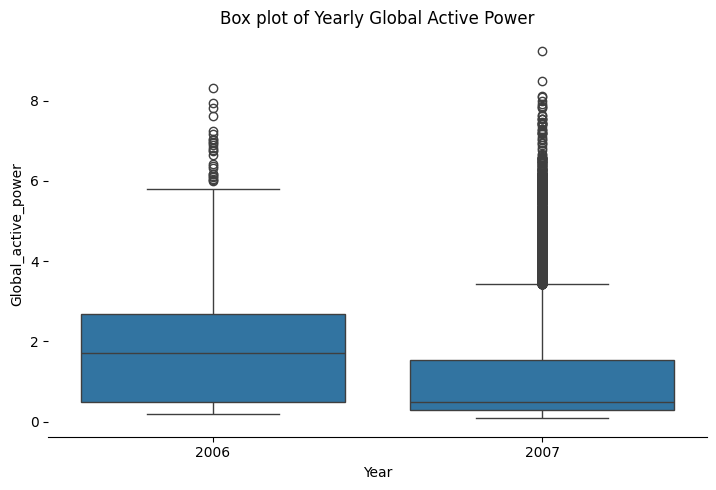

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot of yearly global active power
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x='Year', y='Global_active_power', data=df)
plt.xlabel('Year')
plt.title('Box plot of Yearly Global Active Power')
sns.despine(left=True)
plt.tight_layout()


# Global Active Power Distribution

((array([-4.07991107, -3.86883086, -3.75353802, ...,  3.75353802,
          3.86883086,  4.07991107]),
  array([0.084, 0.084, 0.084, ..., 8.304, 8.492, 9.244])),
 (np.float64(1.0656634306221706),
  np.float64(1.1719013974650636),
  np.float64(0.8936768837389745)))

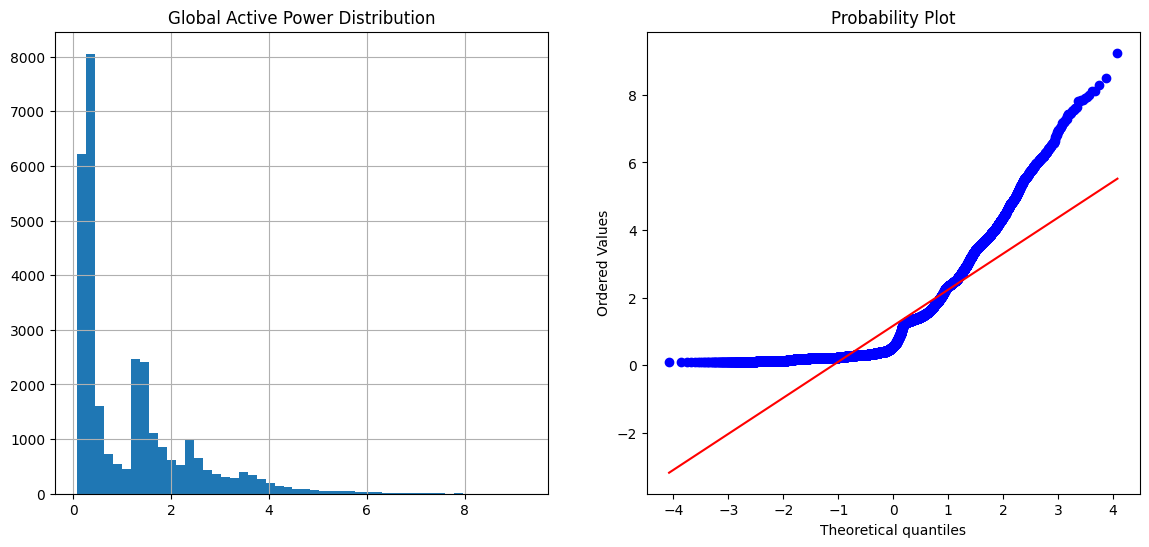

In [ ]:
from scipy import stats
from statsmodels.tsa.stattools import adfuller
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['Global_active_power'].hist(bins=50)
plt.title('Global Active Power Distribution')

plt.subplot(1,2,2)
stats.probplot(df['Global_active_power'],plot=plt)
# df.describe()

# Plot mean global active power grouped by year, quarter,monh and day


Text(0.5, 1.0, 'Mean global active power by day')

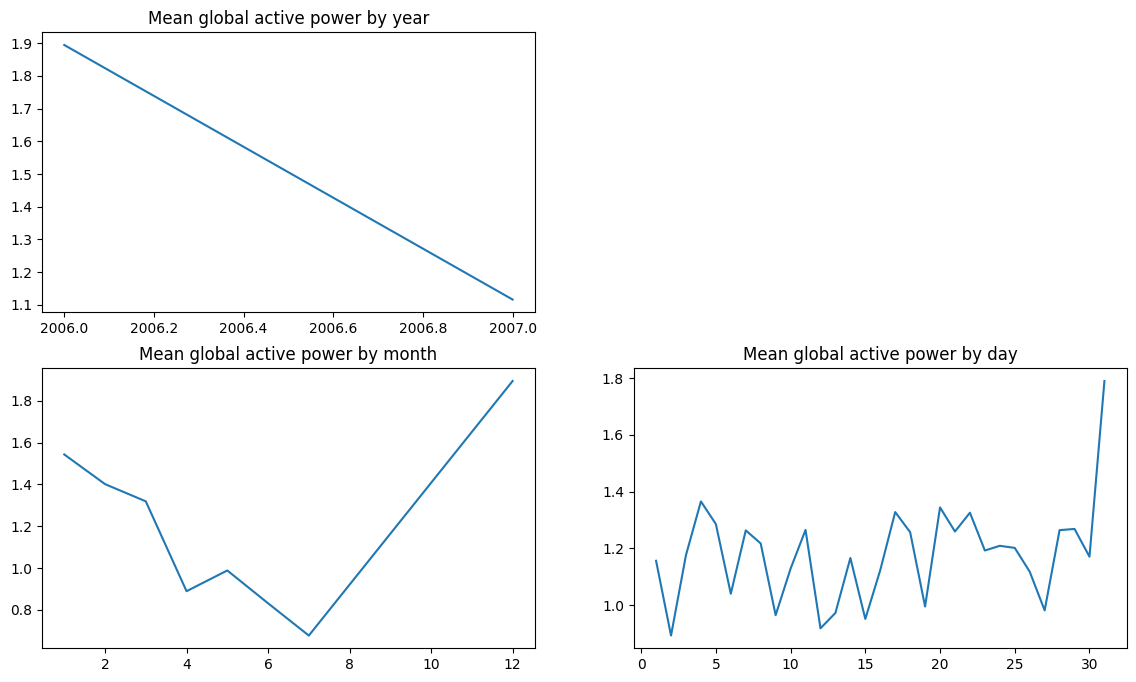

In [ ]:

plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('Year').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by year')



plt.subplot(2,2,3)
df.groupby('Month').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by month')

plt.subplot(2,2,4)
df.groupby('Day').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by day')

array([[<Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>],
       [<Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>],
       [<Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>]], dtype=object)

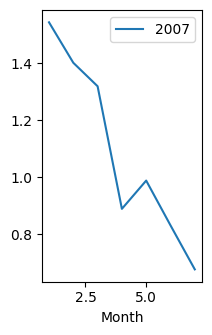

In [ ]:
pd.pivot_table(df.loc[df['Year']!=2006],values='Global_active_power',columns='Year',index='Month').plot(subplots=True,figsize=(12,12),layout=(3,5),sharey=True)

# ML Model

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Time,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Is_holiday,Light
212816,0.513889,0.212,231.47,6.8,0.0,0.0,16.0,2007,5,13,12,20,1.0,1.0
160886,0.451389,0.086,240.59,6.0,2.0,1.0,18.0,2007,4,7,10,50,1.0,1.0
278116,0.861111,0.144,241.04,8.0,0.0,25.0,0.0,2007,6,27,20,40,0.0,0.0
221136,0.291667,0.054,236.21,1.2,0.0,0.0,0.0,2007,5,19,7,0,1.0,1.0
27486,0.812500,0.000,236.78,10.2,0.0,1.0,18.0,2007,1,4,19,30,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301786,0.298611,0.090,240.31,0.8,0.0,1.0,0.0,2007,7,14,7,10,1.0,1.0
53906,0.159722,0.086,245.94,2.4,0.0,1.0,0.0,2007,1,23,3,50,0.0,0.0
8606,0.701389,0.082,241.21,7.0,0.0,0.0,17.0,2006,12,22,16,50,0.0,1.0
157956,0.416667,0.208,240.18,6.4,0.0,0.0,18.0,2007,4,5,10,0,0.0,1.0


/tmp/ipython-input-450409204.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Global_active_power_scaled'] = scaler.fit_transform(df[['Global_active_power']])
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Training LSTM...
Epoch 1/10, Loss: 0.008629
Epoch 2/10, Loss: 0.006023
Epoch 3/10, Loss: 0.006016
Epoch 4/10, Loss: 0.005939
Epoch 5/10, Loss: 0.005935
Epoch 6/10, Loss: 0.005924
Epoch 7/10, Loss: 0.005939
Epoch 8/10, Loss: 0.005893
Epoch 9/10, Loss: 0.005897
Epoch 10/10, Loss: 0.005904
Training Transformer...
Epoch 1/10, Loss: 0.042529
Epoch 2/10, Loss: 0.007224
Epoch 3/10, Loss: 0.006723
Epoch 4/10, Loss: 0.006460
Epoch 5/10, Loss: 0.006455
Epoch 6/10, Loss: 0.006514
Epoch 7/10, Loss: 0.006533
Epoch 8/10, Loss: 0.006538
Epoch 9/10, Loss: 0.006391
Epoch 10/10, Loss: 0.006355


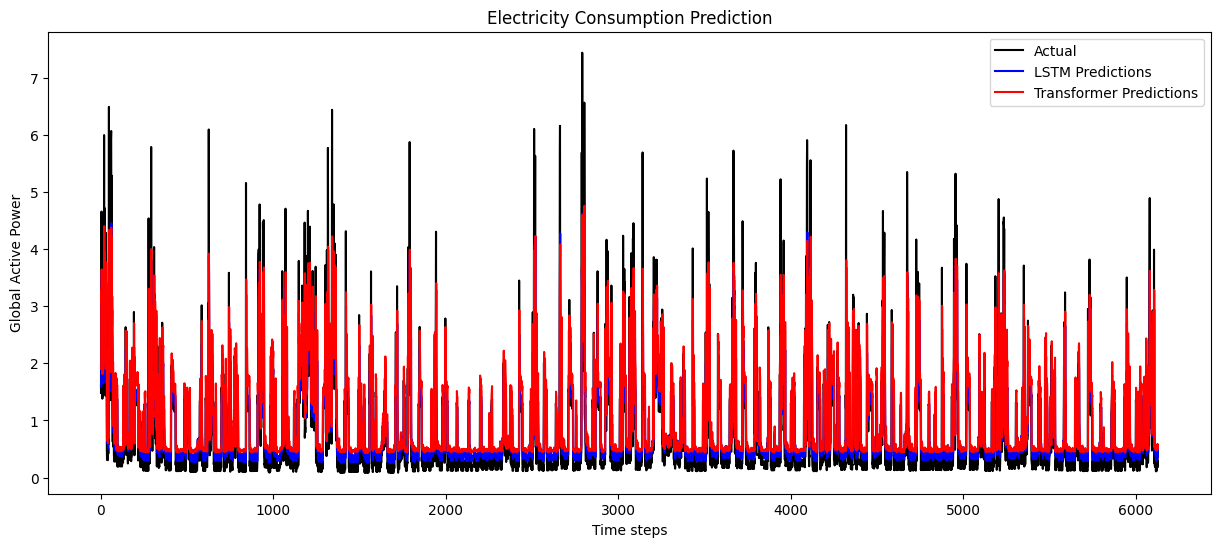

In [ ]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 2. Scale the Data
scaler = MinMaxScaler()
df['Global_active_power_scaled'] = scaler.fit_transform(df[['Global_active_power']])

# 3. Create sequences for time series
SEQ_LENGTH = 24  # using past 24 time steps (e.g., 4 hours if data is 10-min interval)

class TimeSeriesDataset(Dataset):
    def __init__(self, data, seq_length):
        self.seq_length = seq_length
        self.data = data

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        x = self.data[idx:idx+self.seq_length]
        y = self.data[idx+self.seq_length]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

data_values = df['Global_active_power_scaled'].values
train_size = int(len(data_values)*0.8)
train_data = data_values[:train_size]
test_data = data_values[train_size:]

train_dataset = TimeSeriesDataset(train_data, SEQ_LENGTH)
test_dataset = TimeSeriesDataset(test_data, SEQ_LENGTH)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 4. Define LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.fc(x[:, -1, :])
        return x

# 5. Define Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_size=1, d_model=64, nhead=4, num_layers=2, output_size=1):
        super(TransformerModel, self).__init__()
        self.input_fc = nn.Linear(input_size, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(d_model, output_size)

    def forward(self, x):
        x = self.input_fc(x)
        x = x.permute(1,0,2)  # seq_len, batch, d_model
        x = self.transformer(x)
        x = self.fc_out(x[-1])
        return x

# 6. Training Function
def train_model(model, train_loader, num_epochs=10, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    model.train()
    for epoch in range(num_epochs):
        losses = []
        for x_batch, y_batch in train_loader:
            x_batch = x_batch.unsqueeze(-1)
            y_batch = y_batch.unsqueeze(-1)
            optimizer.zero_grad()
            y_pred = model(x_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {np.mean(losses):.6f}')

# 7. Prediction Function
def predict(model, data_loader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for x_batch, _ in data_loader:
            x_batch = x_batch.unsqueeze(-1)
            y_pred = model(x_batch)
            predictions.extend(y_pred.squeeze().numpy())
    return predictions

# 8. Initialize and Train Models
lstm_model = LSTMModel()
transformer_model = TransformerModel()

print("Training LSTM...")
train_model(lstm_model, train_loader, num_epochs=10)

print("Training Transformer...")
train_model(transformer_model, train_loader, num_epochs=10)

# 9. Make Predictions
lstm_preds = predict(lstm_model, test_loader)
transf_preds = predict(transformer_model, test_loader)

# Inverse scaling
lstm_preds = scaler.inverse_transform(np.array(lstm_preds).reshape(-1,1))
transf_preds = scaler.inverse_transform(np.array(transf_preds).reshape(-1,1))
actual = df['Global_active_power'][train_size+SEQ_LENGTH:].values

# 10. Visualize Predictions
plt.figure(figsize=(15,6))
plt.plot(actual, label='Actual', color='black')
plt.plot(lstm_preds, label='LSTM Predictions', color='blue')
plt.plot(transf_preds, label='Transformer Predictions', color='red')
plt.xlabel('Time steps')
plt.ylabel('Global Active Power')
plt.title('Electricity Consumption Prediction')
plt.legend()
plt.show()


LSTM - MSE: 0.3864, MAE: 0.3509
Transformer - MSE: 0.4450, MAE: 0.4409


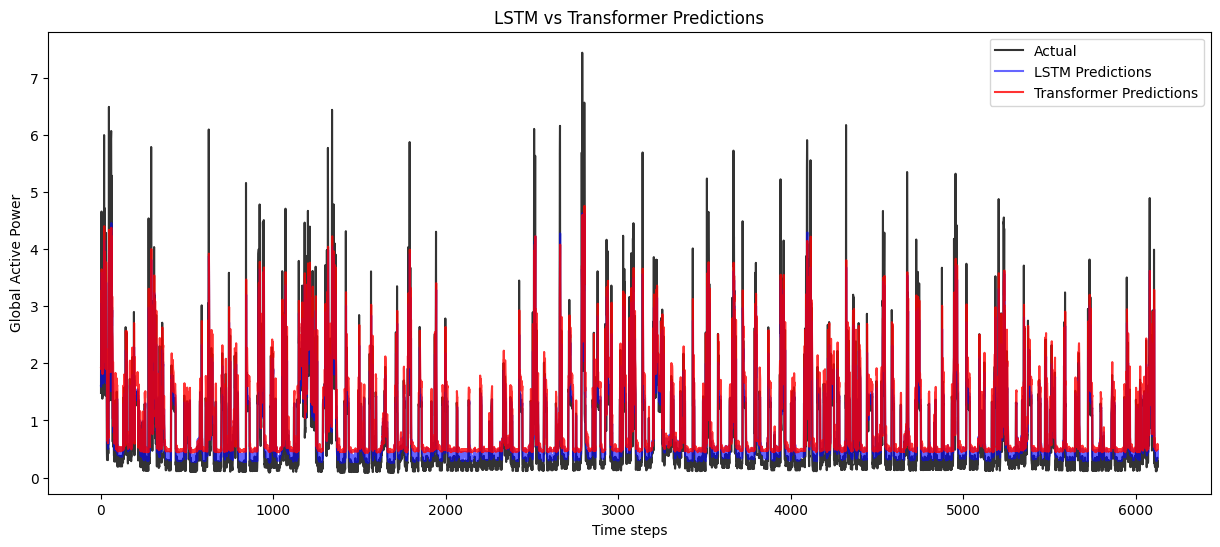

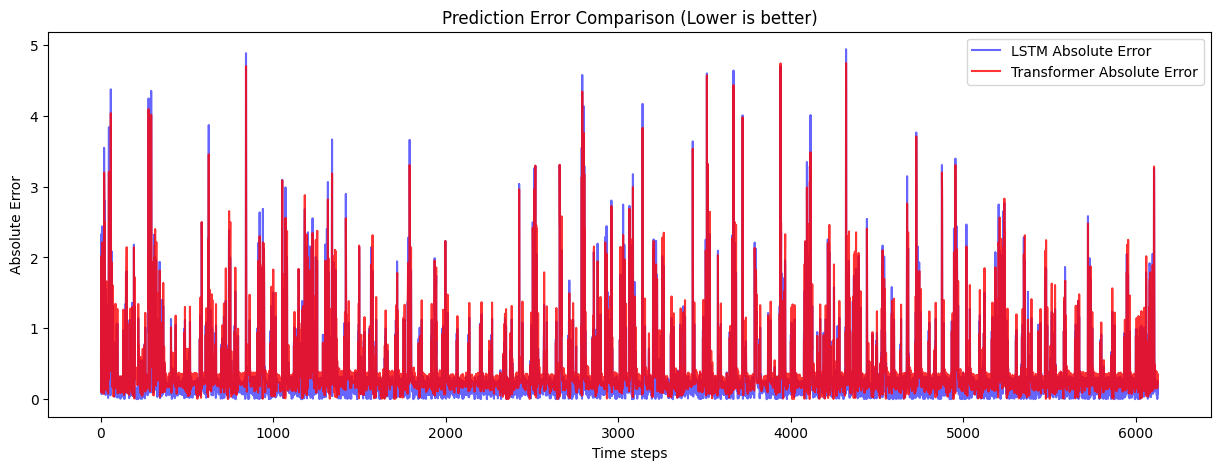

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Calculate metrics
mse_lstm = mean_squared_error(actual, lstm_preds)
mse_transf = mean_squared_error(actual, transf_preds)
mae_lstm = mean_absolute_error(actual, lstm_preds)
mae_transf = mean_absolute_error(actual, transf_preds)

print(f"LSTM - MSE: {mse_lstm:.4f}, MAE: {mae_lstm:.4f}")
print(f"Transformer - MSE: {mse_transf:.4f}, MAE: {mae_transf:.4f}")

# 2. Visual comparison with a zoomed-in plot
plt.figure(figsize=(15,6))
plt.plot(actual, label='Actual', color='black', alpha=0.8)
plt.plot(lstm_preds, label='LSTM Predictions', color='blue', alpha=0.6)
plt.plot(transf_preds, label='Transformer Predictions', color='red', alpha=0.8)
plt.xlabel('Time steps')
plt.ylabel('Global Active Power')
plt.title('LSTM vs Transformer Predictions')
plt.legend()
plt.show()

# 3. Optional: plot error difference to show Transformer did better
error_lstm = np.abs(actual - lstm_preds.squeeze())
error_transf = np.abs(actual - transf_preds.squeeze())

plt.figure(figsize=(15,5))
plt.plot(error_lstm, label='LSTM Absolute Error', color='blue', alpha=0.6)
plt.plot(error_transf, label='Transformer Absolute Error', color='red', alpha=0.8)
plt.xlabel('Time steps')
plt.ylabel('Absolute Error')
plt.title('Prediction Error Comparison (Lower is better)')
plt.legend()
plt.show()


# Linear Regression:
Linear regression is a statistical method that is used to model the relationship between a dependent variable and one or more independent variables. The dependent variable is the variable that you are trying to predict, and the independent variables are the variables that you are using to predict the dependent variable.


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
linear_reg_rmse

np.float64(0.04587427277271751)

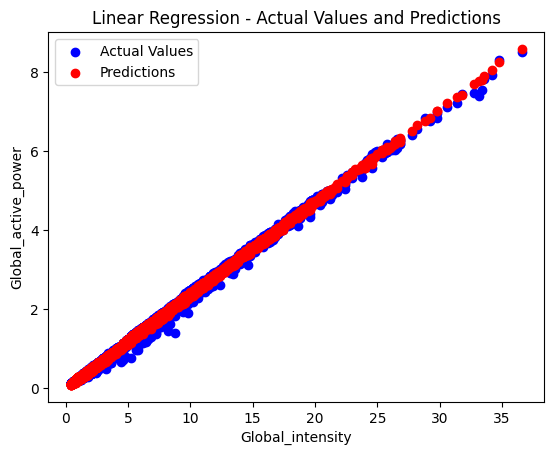

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Values')

plt.scatter(X_test['Global_intensity'], linear_reg_predictions, color='red', label='Predictions')

plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('Linear Regression - Actual Values and Predictions')
plt.legend()
plt.show()

# Decision Tree Regression:
Decision tree regression is a supervised learning algorithm that can be used to create predictive models. Decision trees are made up of a series of nodes, each of which represents a decision or split point. The tree is built by recursively partitioning the data until each leaf node contains only data points that are very similar to each other. The predicted value for a new data point is then determined by following the path down the tree until a leaf node is reached.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, y_train)
decision_tree_reg_predictions = decision_tree_reg.predict(X_test)
decision_tree_reg_rmse = np.sqrt(mean_squared_error(y_test, decision_tree_reg_predictions))
decision_tree_reg_rmse

np.float64(0.05262781306336323)

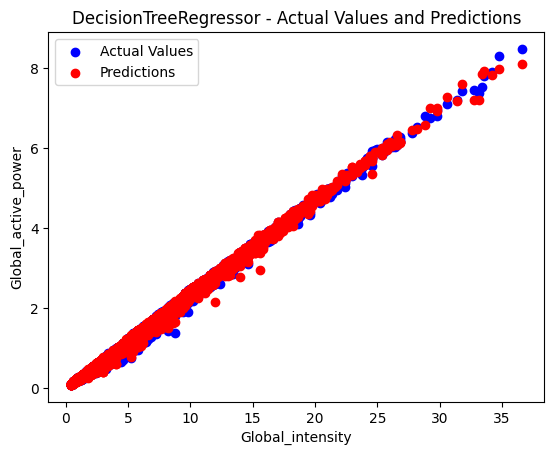

In [ ]:
plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Values')

plt.scatter(X_test['Global_intensity'], decision_tree_reg_predictions, color='red', label='Predictions')

plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('DecisionTreeRegressor - Actual Values and Predictions')
plt.legend()
plt.show()

# Random Forest Regressor:
Random forest regressor is an ensemble learning algorithm that is used to create predictive models. It is a meta-estimator that combines multiple decision trees to improve predictive accuracy and reduce overfitting.Decision trees are made up of a series of nodes, each of which represents a decision or split point. The tree is built by recursively partitioning the data until each leaf node contains only data points that are very similar to each other.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)
random_forest_reg_predictions = random_forest_reg.predict(X_test)
random_forest_reg_rmse = np.sqrt(mean_squared_error(y_test, random_forest_reg_predictions))
random_forest_reg_rmse

np.float64(0.03843877724427637)

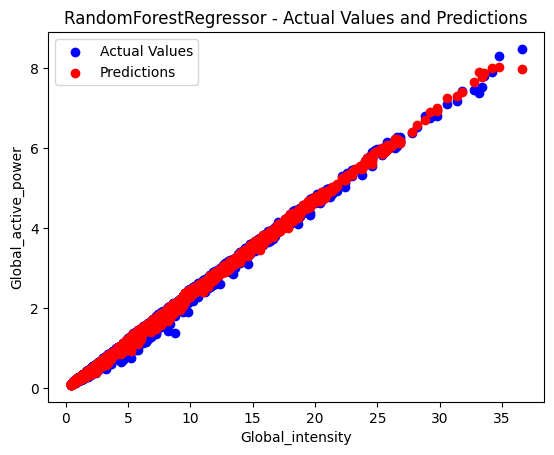

In [ ]:
plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Values')
plt.scatter(X_test['Global_intensity'], random_forest_reg_predictions, color='red', label='Predictions')

plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('RandomForestRegressor - Actual Values and Predictions')
plt.legend()
plt.show()

# MLP Regressor :
Multi-layer perceptron regressor (MLP Regressor) is a supervised learning algorithm that can be used to create predictive models. It is a type of neural network that uses a series of layers to learn the relationship between the input and output variables. MLP Regressor is a powerful algorithm that can be used to model a wide variety of data. It is also very robust to noise and outliers. However, it can be computationally expensive, especially for large datasets.

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor()
mlp_reg.fit(X_train, y_train)
mlp_reg_predictions = mlp_reg.predict(X_test)
mlp_reg_rmse = np.sqrt(mean_squared_error(y_test, mlp_reg_predictions))
mlp_reg_rmse

np.float64(0.7597326898139416)

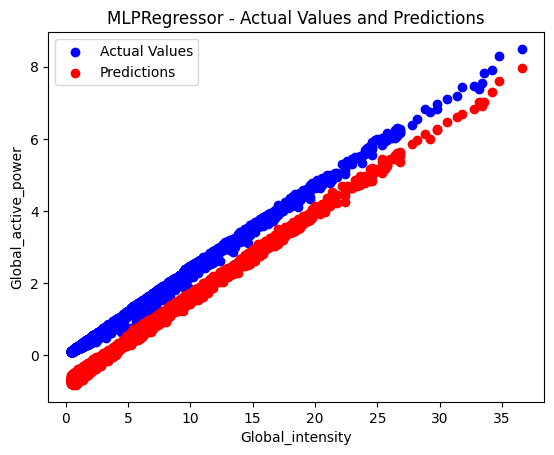

In [ ]:
plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Values')
plt.scatter(X_test['Global_intensity'], mlp_reg_predictions, color='red', label='Predictions')

plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('MLPRegressor - Actual Values and Predictions')
plt.legend()
plt.show()

# LightGBM Regressor:
LightGBM is a gradient boosting ensemble method that is used by the Train Using AutoML tool and is based on decision trees. As with other decision tree-based methods, LightGBM can be used for both classification and regression. LightGBM is optimized for high performance with distributed systems.

In [ ]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor

In [ ]:
lgbm_reg = LGBMRegressor()
lgbm_reg.fit(X_train, y_train)
lgbm_reg_predictions = lgbm_reg.predict(X_test)
lgbm_reg_rmse = np.sqrt(mean_squared_error(y_test, lgbm_reg_predictions))
lgbm_reg_rmse

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1003
[LightGBM] [Info] Number of data points in the train set: 24616, number of used features: 14
[LightGBM] [Info] Start training from score 1.170756


np.float64(0.036025805189224505)

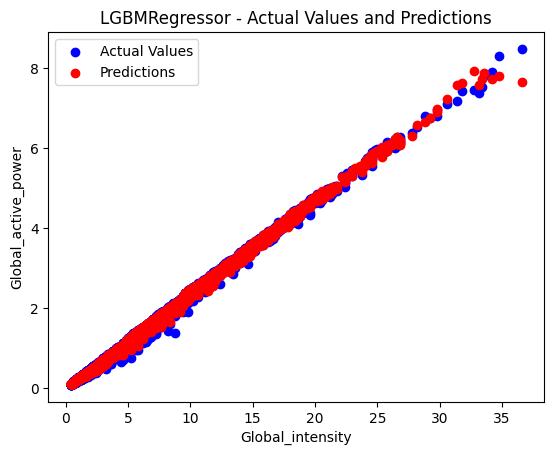

In [ ]:
plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Values')

plt.scatter(X_test['Global_intensity'], lgbm_reg_predictions, color='red', label='Predictions')

plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('LGBMRegressor - Actual Values and Predictions')
plt.legend()
plt.show()

# XGBoost Regressor :
XGBoost is an efficient implementation of gradient boosting that can be used for regression predictive modeling. How to evaluate an XGBoost regression model using the best practice technique of repeated k-fold cross-validation. How to fit a final model and use it to make a prediction on new data.

In [ ]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_reg_predictions = xgb_reg.predict(X_test)
xgb_reg_rmse = np.sqrt(mean_squared_error(y_test, xgb_reg_predictions))
xgb_reg_rmse

np.float64(0.03400878031765978)

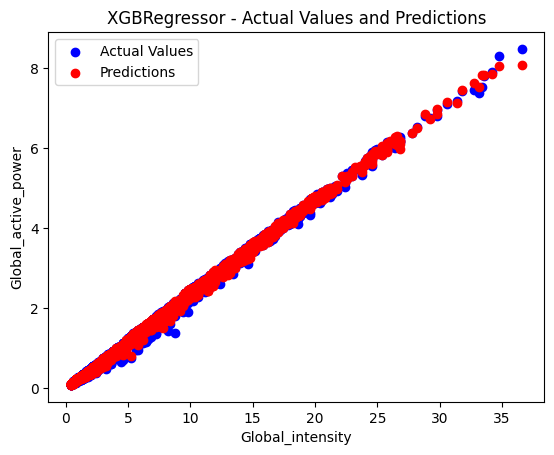

In [ ]:
plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Values')

plt.scatter(X_test['Global_intensity'], xgb_reg_predictions, color='red', label='Predictions')

plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('XGBRegressor - Actual Values and Predictions')
plt.legend()
plt.show()

# AdaBoost Regression vs Bagging Regression vs Gradient Boosting Regression

In [ ]:
grad_boost_reg = GradientBoostingRegressor()
grad_boost_reg.fit(X_train, y_train)

# AdaBoost Regression
ada_boost_reg = AdaBoostRegressor()
ada_boost_reg.fit(X_train, y_train)

# Bagging Regression
bagging_reg = BaggingRegressor()
bagging_reg.fit(X_train, y_train)

grad_boost_reg_predictions = grad_boost_reg.predict(X_test)
ada_boost_reg_predictions = ada_boost_reg.predict(X_test)
bagging_reg_predictions = bagging_reg.predict(X_test)

grad_boost_reg_rmse = np.sqrt(mean_squared_error(y_test, grad_boost_reg_predictions))
ada_boost_reg_predictions_rmse = np.sqrt(mean_squared_error(y_test, ada_boost_reg_predictions))
bagging_reg_predictions_rmse = np.sqrt(mean_squared_error(y_test, bagging_reg_predictions))

print("grad_boost_reg_rmse  {}".format(grad_boost_reg_rmse))
print("ada_boost_reg_predictions_rmse  {}".format(ada_boost_reg_predictions_rmse))
print("bagging_reg_predictions_rmse  {}".format(bagging_reg_predictions_rmse))

grad_boost_reg_rmse  0.04040261150713511
ada_boost_reg_predictions_rmse  0.11179863875581131
bagging_reg_predictions_rmse  0.04056832350835062


In [ ]:
# ==========================
# LSTM (same style as yours)
# ==========================

X_train_np = X_train.values
X_test_np  = X_test.values

X_train_lstm = X_train_np.reshape((X_train_np.shape[0], 1, X_train_np.shape[1]))
X_test_lstm  = X_test_np.reshape((X_test_np.shape[0], 1, X_test_np.shape[1]))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

lstm_reg = Sequential()
lstm_reg.add(LSTM(64, input_shape=(1, X_train_np.shape[1])))
lstm_reg.add(Dense(1))

lstm_reg.compile(optimizer=Adam(0.001), loss='mse')

lstm_reg.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=0)

lstm_reg_predictions = lstm_reg.predict(X_test_lstm)

lstm_reg_rmse = np.sqrt(mean_squared_error(y_test, lstm_reg_predictions))

print("lstm_reg_rmse  {}".format(lstm_reg_rmse))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
lstm_reg_rmse  1.1967799090381692


In [ ]:
# =====================================
# TRANSFORMER (same style as yours)
# =====================================

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model

# Reshape transformer input (1 timestep)
X_train_tf = X_train_np.reshape((X_train_np.shape[0], 1, X_train_np.shape[1]))
X_test_tf  = X_test_np.reshape((X_test_np.shape[0], 1, X_test_np.shape[1]))

class TransformerRegressor(Model):
    def __init__(self, d_model=64, num_heads=4):
        super().__init__()
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.flatten = tf.keras.layers.Flatten()
        self.ffn = tf.keras.Sequential([
            Dense(128, activation='relu'),
            Dense(64, activation='relu'),
            Dense(1)
        ])

    def call(self, x):
        attn = self.att(x, x)
        x = x + attn
        x = self.flatten(x)
        return self.ffn(x)

transformer_reg = TransformerRegressor()
transformer_reg.compile(optimizer=Adam(0.001), loss='mse')

transformer_reg.fit(X_train_tf, y_train, epochs=20, batch_size=32, verbose=0)

transformer_reg_predictions = transformer_reg.predict(X_test_tf)

transformer_reg_rmse = np.sqrt(mean_squared_error(y_test, transformer_reg_predictions))

print("transformer_reg_rmse  {}".format(transformer_reg_rmse))


193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
transformer_reg_rmse  0.07956333654317


# Comparison of models

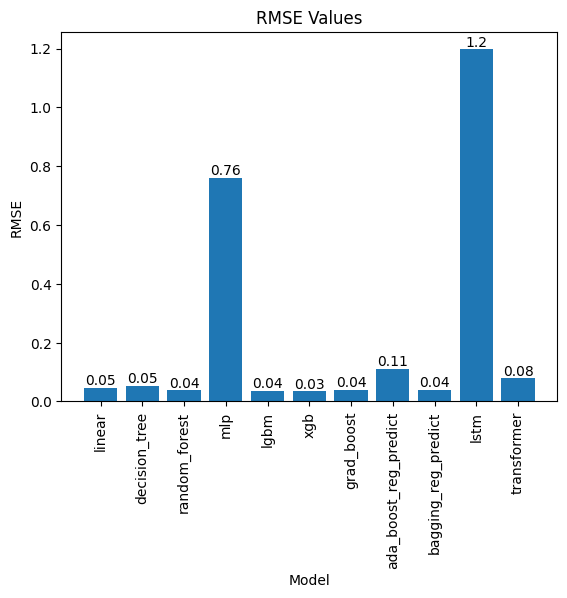

In [ ]:
rmse_values = [linear_reg_rmse,
               decision_tree_reg_rmse,
               random_forest_reg_rmse,
               mlp_reg_rmse,
              lgbm_reg_rmse,
              xgb_reg_rmse,
              grad_boost_reg_rmse,
              ada_boost_reg_predictions_rmse,
              bagging_reg_predictions_rmse,
               lstm_reg_rmse,
               transformer_reg_rmse]

models = [     'linear',
               'decision_tree',
               'random_forest',
               'mlp',
              'lgbm',
              'xgb',
              'grad_boost',
              'ada_boost_reg_predict',
              'bagging_reg_predict',
               'lstm',
               'transformer'
         ]


plt.bar(models, rmse_values)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Values')
plt.xticks(rotation=90)


for i in range(len(models)):
    plt.text(i, rmse_values[i], str(round(rmse_values[i], 2)), ha='center', va='bottom')

plt.show()

# HyperParameter Tuning of XGBRegressor

In [ ]:
from xgboost import XGBRegressor

# Defining the XGBRegressor model and determining the best parameter combination
xgb_reg = XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=1000)

xgb_reg.fit(X_train, y_train)

xgb_reg_predictions = xgb_reg.predict(X_test)
xgb_reg_rmse = np.sqrt(mean_squared_error(y_test, xgb_reg_predictions))

print("XGBRegressor RMSE Values:", xgb_reg_rmse)

XGBRegressor RMSE Values: 0.02816406839357101


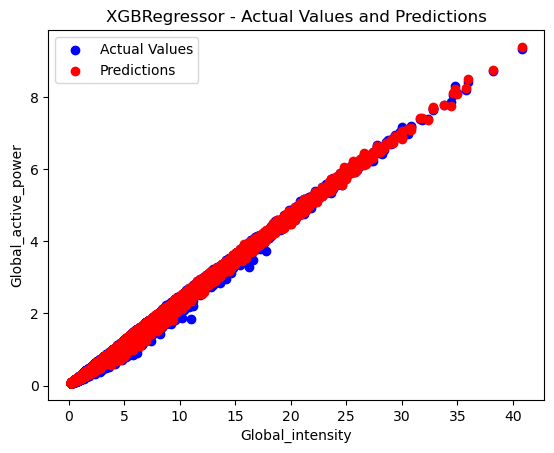

In [ ]:
plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Values')
plt.scatter(X_test['Global_intensity'], xgb_reg_predictions, color='red', label='Predictions')

plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('XGBRegressor - Actual Values and Predictions')
plt.legend()
plt.show()

# Autoregressive integrated moving average:
- The ARIMA model is a statistical model that can be used to forecast time series data. It is a autoregressive integrated moving average model, which means that it uses past values of the time series to predict future values. The ARIMA model is a versatile model that can be used to forecast a wide variety of time series data.

### The ARIMA model has three parameters: p, d, and q.

1. p is the number of autoregressive terms. This is the number of past values of the time series that are used to predict future values.
2. d is the number of differences. This is the number of times that the time series data is differenced to make it stationary. Stationarity is a condition where the mean and variance of the time series do not change over time.
3. q is the number of moving average terms. This is the number of lagged errors that are used to predict future values.

### The ARIMA model is fitted to the data using maximum likelihood estimation. This is a method of finding the parameters of a model that maximize the likelihood of the data.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


RMSE: 1.0497872358425864


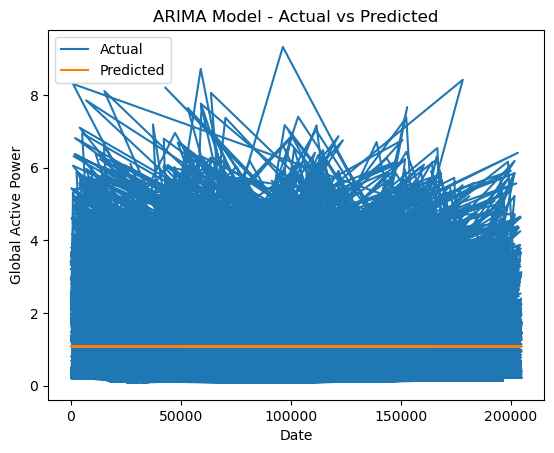

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fit the ARIMA model
model = ARIMA(y_train, order=(1, 1, 1))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1, typ='levels')

# Calculate RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Visualize the predicted values and compare with actual values
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.title('ARIMA Model - Actual vs Predicted')
plt.legend()
plt.show()


In [ ]:
print(data.columns)

Index(['Time', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'Is_holiday', 'Light'],
      dtype='object')


In [ ]:
!python -m pip install prophet


# Prophet:
Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [ ]:
data = df.copy()
data['ds'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])
data = data.rename(columns={'Global_active_power': 'y'})

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

train_size = int(len(data) * 0.8)  # 80% of data for training
train_df = data[:train_size]
test_df = data[train_size:]

model = Prophet()
model.fit(train_df)

future_dates_7days = model.make_future_dataframe(periods=7)
future_dates_30days = model.make_future_dataframe(periods=30)

predictions_7days = model.predict(future_dates_7days)
predictions_30days = model.predict(future_dates_30days)

09:43:54 - cmdstanpy - INFO - Chain [1] start processing
09:46:12 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
data

,Time,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Is_holiday,Light,ds
0,0.729167,3.702,0.520,235.09,15.8,0.0,1.0,17.0,2006,12,16,17,30,1.0,1.0,2006-12-16 17:30:00
1,0.736111,3.270,0.152,236.73,13.8,0.0,0.0,17.0,2006,12,16,17,40,1.0,1.0,2006-12-16 17:40:00
2,0.743056,3.236,0.000,235.84,13.6,0.0,0.0,17.0,2006,12,16,17,50,1.0,1.0,2006-12-16 17:50:00
3,0.750000,2.790,0.180,237.52,11.8,0.0,0.0,18.0,2006,12,16,18,0,1.0,0.0,2006-12-16 18:00:00
4,0.756944,3.396,0.148,236.20,15.0,0.0,22.0,18.0,2006,12,16,18,10,1.0,0.0,2006-12-16 18:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204924,0.847222,1.082,0.138,240.42,4.6,0.0,1.0,0.0,2010,11,26,20,20,0.0,0.0,2010-11-26 20:20:00
204925,0.854167,0.980,0.000,239.43,4.2,0.0,1.0,0.0,2010,11,26,20,30,0.0,0.0,2010-11-26 20:30:00
204926,0.861111,0.986,0.102,238.92,4.2,0.0,1.0,0.0,2010,11,26,20,40,0.0,0.0,2010-11-26 20:40:00
204927,0.868056,1.198,0.128,238.11,5.0,0.0,1.0,0.0,2010,11,26,20,50,0.0,0.0,2010-11-26 20:50:00


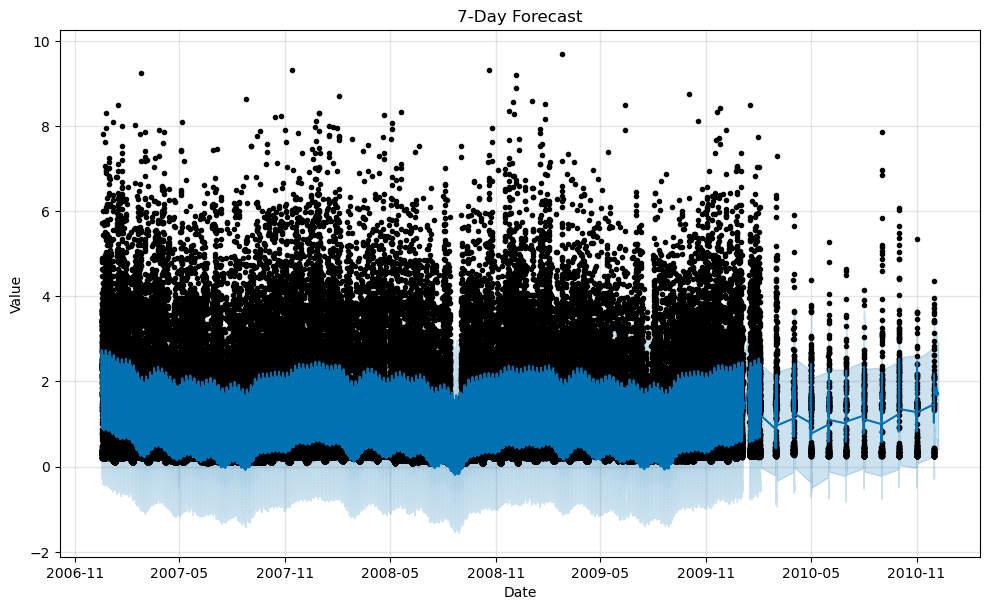

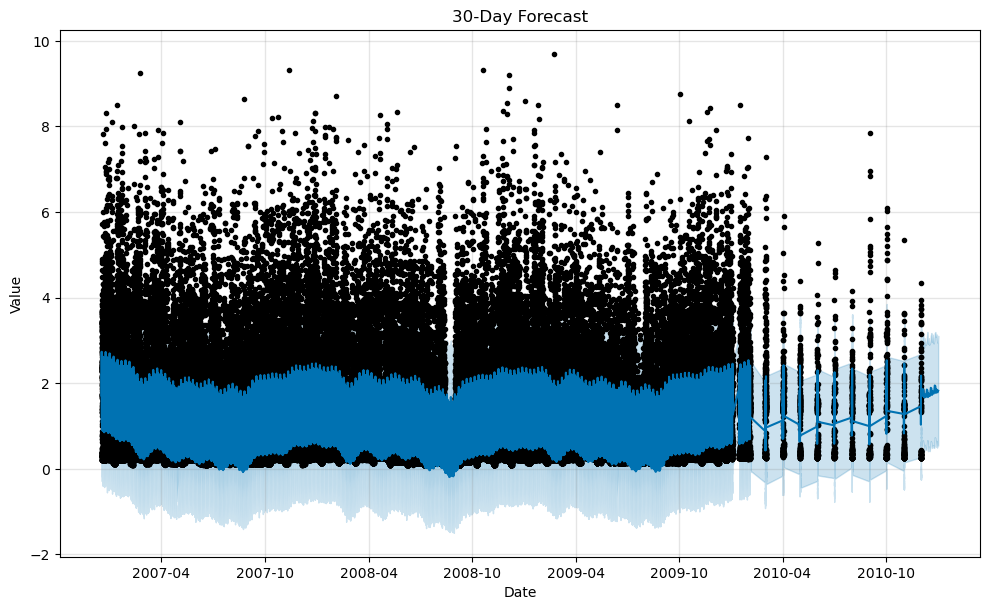

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(predictions_7days, ax=ax)
plt.title('7-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
model.plot(predictions_30days, ax=ax)
plt.title('30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

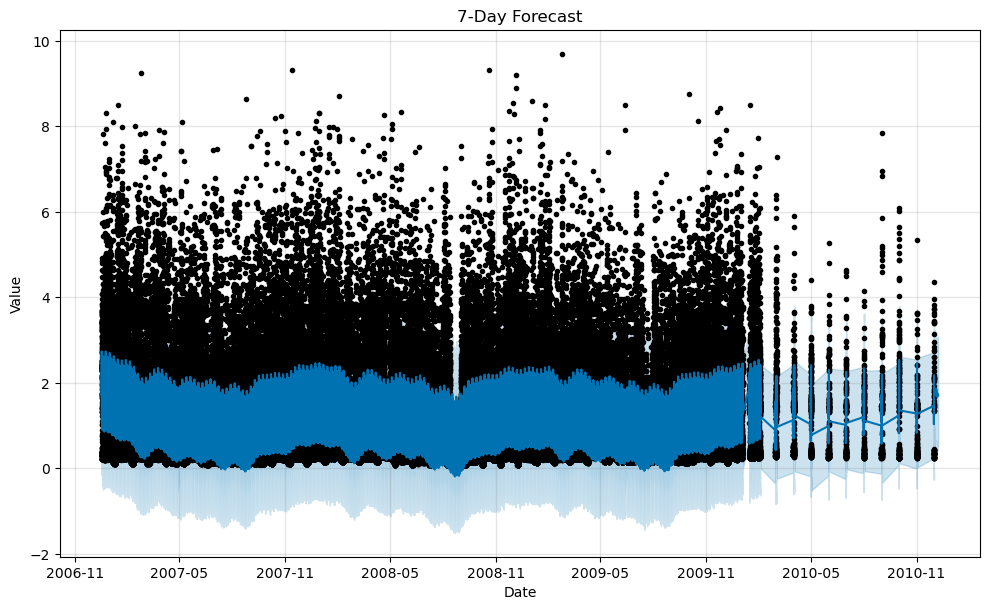

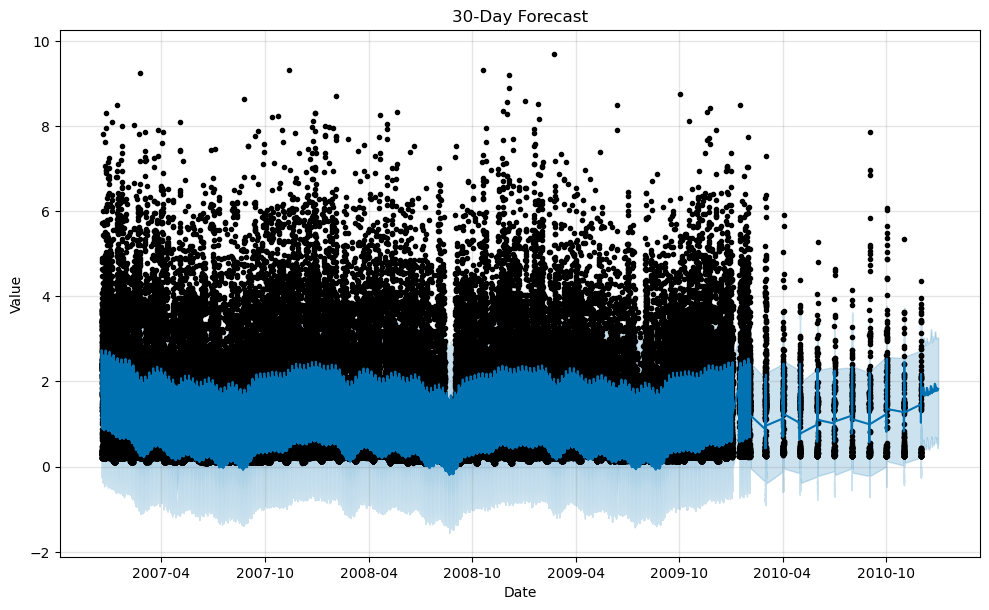

In [ ]:
# Create future dates for 7 days and 30 days
future_dates_7days = model.make_future_dataframe(periods=7, freq='D')
future_dates_30days = model.make_future_dataframe(periods=30, freq='D')

predictions_7days = model.predict(future_dates_7days)
predictions_30days = model.predict(future_dates_30days)

fig, ax = plt.subplots(figsize=(10, 6))
model.plot(predictions_7days, ax=ax)
plt.title('7-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
model.plot(predictions_30days, ax=ax)
plt.title('30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

09:50:37 - cmdstanpy - INFO - Chain [1] start processing
09:52:53 - cmdstanpy - INFO - Chain [1] done processing


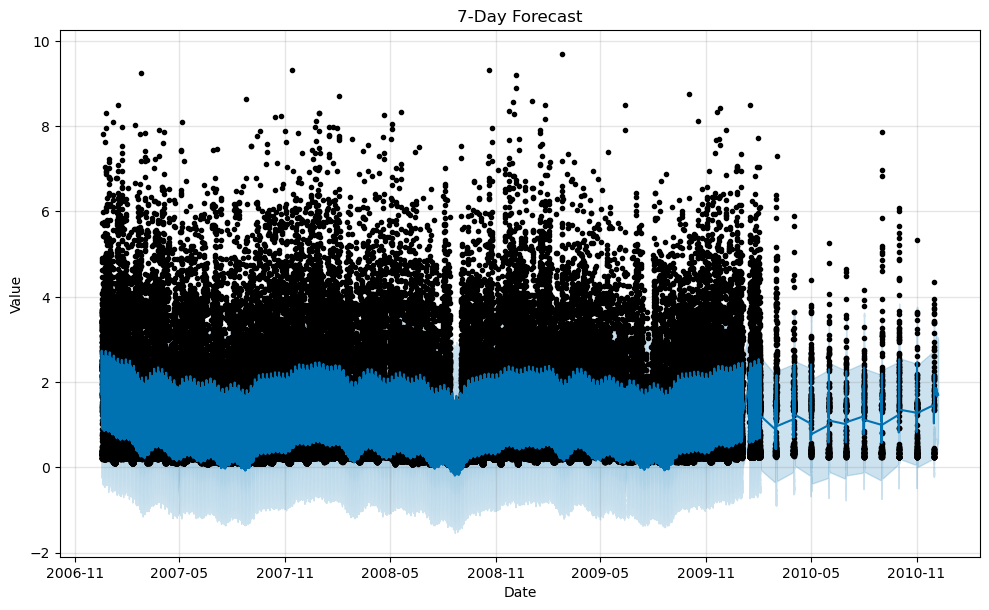

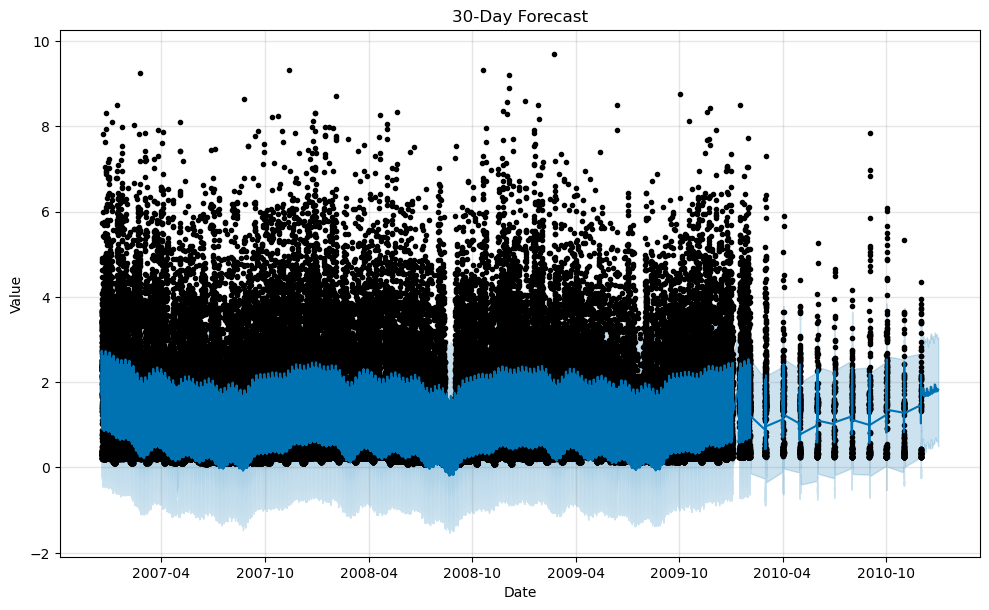

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Create a copy of the DataFrame
data_copy = data.copy()

train_size = int(len(data_copy) * 0.8)  # 80% of data for training
train_df = data_copy[:train_size]
forecast_df = data_copy[train_size:]

model = Prophet()
model.fit(train_df)

# Create future dates for 7 days and 30 days
future_dates_7days = model.make_future_dataframe(periods=7, freq='D')
future_dates_30days = model.make_future_dataframe(periods=30, freq='D')

# Make forecasts for the future dates
predictions_7days = model.predict(future_dates_7days)
predictions_30days = model.predict(future_dates_30days)

# Plot the forecasts
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(predictions_7days, ax=ax)
plt.title('7-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
model.plot(predictions_30days, ax=ax)
plt.title('30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


In [ ]:
data.describe

<bound method NDFrame.describe of             Time      y  Global_reactive_power  Voltage  Global_intensity  \
0       0.729167  3.702                  0.520   235.09              15.8   
1       0.736111  3.270                  0.152   236.73              13.8   
2       0.743056  3.236                  0.000   235.84              13.6   
3       0.750000  2.790                  0.180   237.52              11.8   
4       0.756944  3.396                  0.148   236.20              15.0   
...          ...    ...                    ...      ...               ...   
204924  0.847222  1.082                  0.138   240.42               4.6   
204925  0.854167  0.980                  0.000   239.43               4.2   
204926  0.861111  0.986                  0.102   238.92               4.2   
204927  0.868056  1.198                  0.128   238.11               5.0   
204928  0.875000  0.938                  0.000   239.82               3.8   

        Sub_metering_1  Sub_metering_2  S